In [953]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [954]:
tracts_demo = gpd.read_file('../Data/tract_with_info_v4.shp')
tracts_demo.set_index('Tract',inplace=True)
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_,%Asian,%Other,%Mixed,%Edu_hs,%Edu_bac,...,Agg_Inc,M_Age_Wor,M_Age_All,Perc_Car,Perc_Trans,Perc_Bus,Perc_Subw,Center_Lat,Center_Lon,geometry
Tract,,,,,,,,,,,,,,,,,,,,,
36061009800,7302,6646,75.458778,2.095316,9.832922,10.832649,0.136949,1.643385,95.786940,76.482094,...,862545500.0,36.1,41.6,8.229098,32.236120,0.438885,30.480579,40.755788,-73.967775,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
36061010200,122,102,54.918033,5.737705,11.475410,1.639344,22.950820,3.278689,100.000000,67.647059,...,5456900.0,37.5,39.7,11.111111,25.396825,3.174603,22.222222,40.759424,-73.974449,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
36061010400,811,790,63.008631,1.479655,9.001233,19.235512,6.041924,1.233046,97.594937,81.392405,...,137802400.0,41.8,51.4,1.757469,38.840070,0.878735,37.082601,40.760779,-73.977673,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
36061011300,98,98,15.306122,38.775510,0.000000,33.673469,0.000000,12.244898,89.795918,44.897959,...,4742200.0,32.1,43.4,0.000000,33.333333,0.000000,33.333333,40.754775,-73.987870,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
36061013000,3314,2898,87.326494,0.603500,5.461678,4.345202,0.603500,1.659626,99.309869,83.850932,...,692282600.0,49.8,57.7,18.822768,39.391979,14.165589,23.609314,40.772736,-73.964734,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [955]:
tracts_demo.describe()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_,%Asian,%Other,%Mixed,%Edu_hs,%Edu_bac,...,Median_Inc,Agg_Inc,M_Age_Wor,M_Age_All,Perc_Car,Perc_Trans,Perc_Bus,Perc_Subw,Center_Lat,Center_Lon
count,2055.000000,2055.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,...,2.055000e+03,2.043000e+03,2.055000e+03,2.055000e+03,2010.000000,2010.000000,2010.000000,2010.000000,2055.000000,2055.000000
mean,3865.899270,3062.829197,30.809432,23.824717,27.504339,14.590556,1.255685,2.015272,82.430017,34.372483,...,-2.134296e+07,1.357259e+08,-1.589615e+07,-1.427409e+07,28.422507,55.483643,10.175137,43.485546,40.722808,-73.904015
std,2248.984208,1853.248725,28.642716,28.726896,22.708256,17.257360,3.048066,2.088858,10.847806,20.756885,...,1.175812e+08,2.224889e+08,1.017340e+08,9.652393e+07,17.915621,15.499032,7.204452,17.505402,0.080665,0.072155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,...,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,40.556103,-74.042338
25%,2332.500000,1813.000000,3.869601,1.801321,9.747913,2.302249,0.000000,0.483275,75.240322,19.332267,...,4.502450e+04,6.324225e+07,3.610000e+01,3.310000e+01,13.585466,44.567299,4.736852,30.180147,40.663876,-73.958656
50%,3522.000000,2762.000000,20.829491,8.637677,18.927328,7.229804,0.303520,1.486221,84.209771,28.783611,...,6.416700e+04,9.670990e+07,3.940000e+01,3.680000e+01,24.849307,56.956426,8.925751,43.953063,40.712552,-73.914586
75%,4898.000000,3854.500000,55.585249,40.118290,41.535953,21.221069,1.145257,2.860177,90.566492,44.516510,...,8.519500e+04,1.544596e+08,4.200000e+01,4.135000e+01,41.824118,67.732162,14.512860,57.708350,40.774374,-73.857820
max,28109.000000,24166.000000,100.000000,100.000000,92.430905,91.605249,31.090573,20.276498,100.000000,100.000000,...,2.500010e+05,1.430119e+09,5.170000e+01,8.210000e+01,100.000000,100.000000,69.105691,100.000000,40.912950,-73.704582


In [956]:
tracts_demo.columns

Index(['Pop_Tot', 'Pop_18', '%White', '%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', '%Edu_hs', '%Edu_bac', 'J_Tot', 'J_W_1', 'J_B_1',
       'J_W_2', 'J_B_2', 'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor',
       'M_Age_All', 'Perc_Car', 'Perc_Trans', 'Perc_Bus', 'Perc_Subw',
       'Center_Lat', 'Center_Lon', 'geometry'],
      dtype='object')

In [957]:
tracts_demo['%NonWhite'] = tracts_demo[['%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed']].sum(axis = 1)

In [958]:
for col in tracts_demo.columns:
    if "%" in col:
        tracts_demo['Perc_'+col[1:]]=tracts_demo[col]
        tracts_demo.drop(labels=col,axis=1,inplace=True)

In [959]:
tracts_demo.columns

Index(['Pop_Tot', 'Pop_18', 'J_Tot', 'J_W_1', 'J_B_1', 'J_W_2', 'J_B_2',
       'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'Perc_Car',
       'Perc_Trans', 'Perc_Bus', 'Perc_Subw', 'Center_Lat', 'Center_Lon',
       'geometry', 'Perc_White', 'Perc_Black', 'Perc_Hispanic_', 'Perc_Asian',
       'Perc_Other', 'Perc_Mixed', 'Perc_Edu_hs', 'Perc_Edu_bac',
       'Perc_NonWhite'],
      dtype='object')

In [960]:
tracts_demo.drop(labels=['geometry', 'Center_Lat', 'Center_Lon'],axis=1,inplace=True)

In [961]:
# tracts_demo = tracts_demo[['Pop_Tot', 'Pop_18', '%White', '%NonWhite','%Black', '%Hispanic_', '%Asian',
#        '%Other', '%Mixed', '%Edu_hs', '%Edu_bac','Median_Inc', 'Agg_Inc', 'M_Age_Wor','M_Age_All','J_Tot', 'J_W_1', 'J_B_1',
#        'J_W_2', 'J_B_2', 'J_B_3']]
# tracts_demo.head()

In [962]:
len(tracts_demo)

2055

<AxesSubplot:>

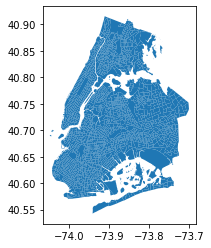

In [963]:
tracts_gdf = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts.shp')
tracts_gdf.plot()

In [964]:
len(tracts_gdf)

2055

In [965]:
tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,36061010200,40.759424,-73.974449,0.172893,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,36061011300,40.754775,-73.987870,0.175672,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,36061013000,40.772736,-73.964734,0.178202,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [966]:
transit_access=pd.read_csv('../Data/weighted_tt.csv', index_col=1)
transit_access = transit_access.iloc[:, 1:]
transit_access.index = transit_access.index.astype(str)
# transit_access.set_index('geoid', inplace=True)
transit_access.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,CBD16,CBD17,CBD18,CBD19,CBD20,CBD21,CBD22,w_tt,mean_tt,min_tt
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,23.0,27.0,25.0,15.0,19.0,13.0,38.0,18.237742,25.409091,3.0
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,20.0,27.0,22.0,22.0,19.0,17.0,38.0,16.932766,24.545455,10.0
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,21.0,28.0,22.0,27.0,22.0,17.0,39.0,18.211283,25.045455,12.0
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,15.0,18.0,19.0,18.0,21.0,16.0,43.0,13.227767,19.863636,7.0
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,32.0,36.0,36.0,11.0,17.0,6.0,51.0,28.875500,31.590909,6.0


In [967]:
len(transit_access)

2041

In [968]:
#merge
tract_info = transit_access.join(tracts_demo,how = 'left')
tract_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,Perc_Subw,Perc_White,Perc_Black,Perc_Hispanic_,Perc_Asian,Perc_Other,Perc_Mixed,Perc_Edu_hs,Perc_Edu_bac,Perc_NonWhite
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,30.480579,75.458778,2.095316,9.832922,10.832649,0.136949,1.643385,95.786940,76.482094,24.541222
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,22.222222,54.918033,5.737705,11.475410,1.639344,22.950820,3.278689,100.000000,67.647059,45.081967
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,37.082601,63.008631,1.479655,9.001233,19.235512,6.041924,1.233046,97.594937,81.392405,36.991369
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,33.333333,15.306122,38.775510,0.000000,33.673469,0.000000,12.244898,89.795918,44.897959,84.693878
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,23.609314,87.326494,0.603500,5.461678,4.345202,0.603500,1.659626,99.309869,83.850932,12.673506


In [969]:
len(tract_info)

2041

In [970]:
perc_ls = ['Perc_White', 'Perc_Black', 'Perc_Hispanic_', 'Perc_Asian','Perc_Other', 'Perc_Mixed', 'Perc_Edu_hs', 'Perc_Edu_bac']
for perc_item in perc_ls:
    col_str = perc_item[5:]
    tract_info[col_str+'Tot'] = tract_info['Pop_Tot']*tract_info[perc_item]/100
    tract_info[col_str+'Above18'] = tract_info['Pop_18']*tract_info[perc_item]/100

In [971]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', 'J_Tot', 'J_W_1', 'J_B_1', 'J_W_2', 'J_B_2',
       'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'Perc_Car',
       'Perc_Trans', 'Perc_Bus', 'Perc_Subw', 'Perc_White', 'Perc_Black',
       'Perc_Hispanic_', 'Perc_Asian', 'Perc_Other', 'Perc_Mixed',
       'Perc_Edu_hs', 'Perc_Edu_bac', 'Perc_NonWhite', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAb

In [972]:
tract_info.describe()#head()

,ctlabel,boro_code,ct2010,boro_ct2010,puma,shape_leng,shape_area,Bus_Access,Subway_Access,Bus_Count,...,AsianTot,AsianAbove18,OtherTot,OtherAbove18,MixedTot,MixedAbove18,Edu_hsTot,Edu_hsAbove18,Edu_bacTot,Edu_bacAbove18
count,2041.000000,2041.000000,2041.000000,2.041000e+03,2041.000000,2041.000000,2.041000e+03,2041.000000,2041.000000,2041.000000,...,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,424.740318,2.875551,42474.031847,2.918025e+06,3962.139637,8094.577315,3.239953e+06,0.999020,0.572268,13.399314,...,561.884289,456.088435,42.344638,33.516142,79.371571,63.981883,3231.371410,2574.819950,1387.622057,1135.714713
std,343.266146,1.017588,34326.614649,1.032858e+06,148.375526,6499.867928,6.246931e+06,0.031296,0.494871,8.324414,...,787.387269,650.608797,96.636485,77.063949,90.010146,73.561698,1876.009883,1594.700967,1390.280783,1213.743091
min,1.000000,1.000000,100.000000,1.000201e+06,3701.000000,2816.869528,4.478078e+05,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,163.000000,2.000000,16300.000000,2.031400e+06,3807.000000,5579.480702,1.665705e+06,1.000000,0.000000,7.000000,...,73.000000,56.060773,0.000000,0.000000,14.000000,11.057026,2005.852905,1554.000000,579.306642,435.000000
50%,328.000000,3.000000,32800.000000,3.046000e+06,4010.000000,6391.921398,1.949162e+06,1.000000,1.000000,12.000000,...,251.000000,199.613445,10.000000,8.268741,52.000000,40.592004,2864.954465,2227.000000,942.676583,726.000000
75%,596.000000,4.000000,59600.000000,4.018700e+06,4103.000000,8004.657932,2.757486e+06,1.000000,1.000000,18.000000,...,754.000000,623.415888,42.000000,33.545699,110.000000,88.825261,3995.890937,3151.000000,1667.174724,1355.000000
max,1621.000000,4.000000,162100.000000,4.162100e+06,4114.000000,96871.415406,1.966544e+08,1.000000,1.000000,83.000000,...,7994.000000,7101.486849,1342.000000,1087.482759,831.000000,718.408731,24241.482620,20841.000000,12714.119880,11466.000000


In [973]:
type(tract_info)

pandas.core.frame.DataFrame

In [974]:
tract_info['geometry'] = tract_info['geometry'].astype(str).apply(loads)
tract_info = gpd.GeoDataFrame(tract_info,geometry = 'geometry').set_crs('epsg:4326')

In [975]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', 'J_Tot', 'J_W_1', 'J_B_1', 'J_W_2', 'J_B_2',
       'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'Perc_Car',
       'Perc_Trans', 'Perc_Bus', 'Perc_Subw', 'Perc_White', 'Perc_Black',
       'Perc_Hispanic_', 'Perc_Asian', 'Perc_Other', 'Perc_Mixed',
       'Perc_Edu_hs', 'Perc_Edu_bac', 'Perc_NonWhite', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAb

In [976]:
tract_info['w_tt'] = tract_info['w_tt'].replace(0, np.nan)

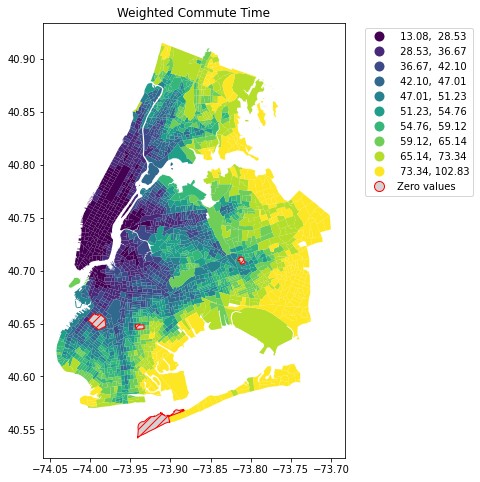

In [977]:
tract_info.plot(column = 'w_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Weighted Commute Time')
plt.show()

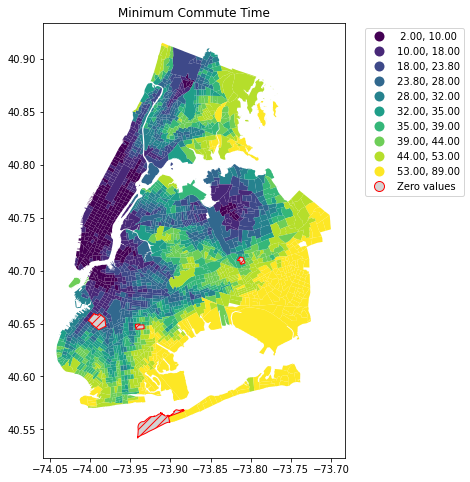

In [978]:
tract_info.plot(column = 'min_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Minimum Commute Time')
plt.show()

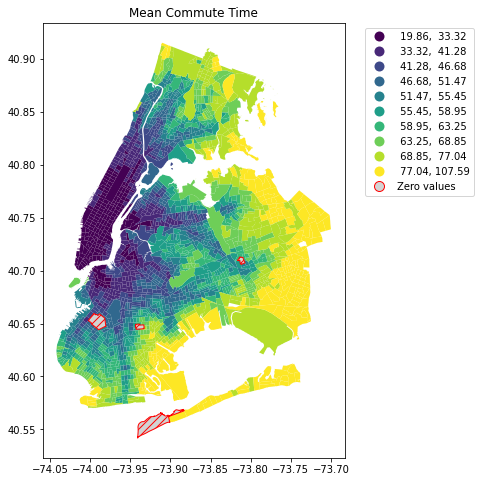

In [979]:
tract_info.plot(column = 'mean_tt',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Mean Commute Time')
plt.show()

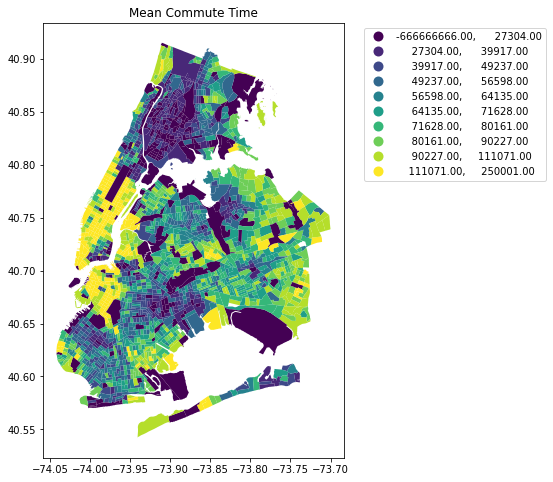

In [980]:
tract_info.plot(column = 'Median_Inc',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              #missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Mean Commute Time')
plt.show()

In [981]:
tract_info['Median_Inc']

geoid
36061009800       129167
36061010200   -666666666
36061010400       125882
36061011300        95313
36061013000       196964
                 ...    
36005007300        22344
36005005100        19115
36005006300        37306
36081001900       141914
36081017100   -666666666
Name: Median_Inc, Length: 2041, dtype: int64

# Look at Commute time distribution by Income Brackets for census tracts

In [982]:
tract_info = tract_info.dropna(subset=['Pop_Tot','Pop_18','mean_tt','min_tt','Median_Inc'],how='any')
tract_info = tract_info[tract_info['Pop_Tot']>0]
tract_info = tract_info[tract_info['Median_Inc']>0]
tract_info['mean_tt'] = tract_info['mean_tt'].replace(0, 1)
tract_info['min_tt'] = tract_info['min_tt'].replace(0, 1)

In [983]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

#check if the distribution is normal using one-sample KS test and sample mean-std
def is_normal(x):
        return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [984]:
tract_info[['M_Age_Wor']].describe()#'M_Age_Wor','M_Age_All'

,M_Age_Wor
count,1977.000000
mean,39.269752
std,4.134212
min,20.000000
25%,36.400000
50%,39.400000
75%,42.000000
max,51.700000


In [985]:
age_col='Agg_Inc' #'M_Age_All'

In [986]:
tract_info.loc[tract_info[age_col]<0]=np.nan
tract_info.drop(index=tract_info[tract_info.w_tt.isna()].index,inplace=True)

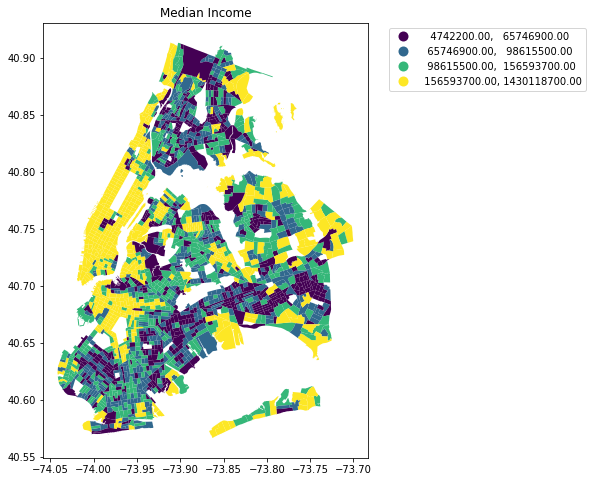

In [987]:
tract_info.plot(column = age_col,figsize = (10,8), k=4, scheme='Quantiles', legend=True, 
              #missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Median Income')
plt.show()

In [988]:
tract_info['Median_q1']=((tract_info[age_col]<np.quantile(tract_info[age_col],q=0.25))&(tract_info[age_col]>=0))*1
tract_info['Median_q4']=(tract_info[age_col]>=np.quantile(tract_info[age_col],q=0.75))*1
tract_info['Median_q2']=((tract_info[age_col]>=np.quantile(tract_info[age_col],q=0.25))&(tract_info[age_col]<np.quantile(tract_info[age_col],q=0.5)))*1
tract_info['Median_q3']=((tract_info[age_col]>=np.quantile(tract_info[age_col],q=0.5))&(tract_info[age_col]<np.quantile(tract_info[age_col],q=0.75)))*1

In [989]:
q1_df = tract_info[tract_info['Median_q1']==1]
q2_df = tract_info[tract_info['Median_q2']==1]
q3_df = tract_info[tract_info['Median_q3']==1]
q4_df = tract_info[tract_info['Median_q4']==1]

print(len(q1_df ),len(q2_df ),len(q3_df ),len(q4_df ))

494 494 494 495


Mean = 56.02
Standard deviation = 13.45
1 percentile = 25.49
5 percentile = 33.84
25 percentile = 47.59
50 percentile = 55.05
75 percentile = 65.23
95 percentile = 79.07
99 percentile = 86.97


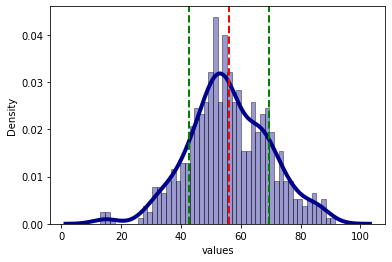

In [990]:
distribution_analysis(q1_df['w_tt'])

Mean = 55.69
Standard deviation = 12.63
1 percentile = 28.17
5 percentile = 36.11
25 percentile = 47.59
50 percentile = 54.56
75 percentile = 62.70
95 percentile = 78.17
99 percentile = 89.95


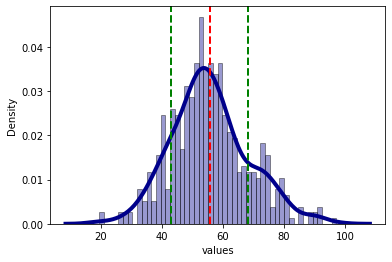

In [991]:
distribution_analysis(q2_df['w_tt'])

Mean = 51.92
Standard deviation = 14.97
1 percentile = 19.91
5 percentile = 29.62
25 percentile = 40.96
50 percentile = 50.70
75 percentile = 60.69
95 percentile = 78.38
99 percentile = 91.20


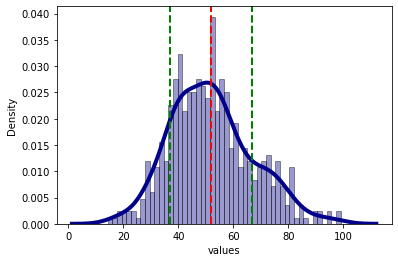

In [992]:
distribution_analysis(q3_df['w_tt'])

Mean = 39.54
Standard deviation = 18.89
1 percentile = 15.74
5 percentile = 17.42
25 percentile = 25.93
50 percentile = 34.89
75 percentile = 46.66
95 percentile = 81.01
99 percentile = 88.31


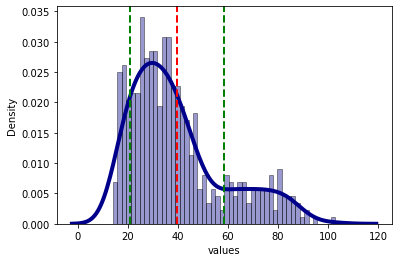

In [993]:
distribution_analysis(q4_df['w_tt'])

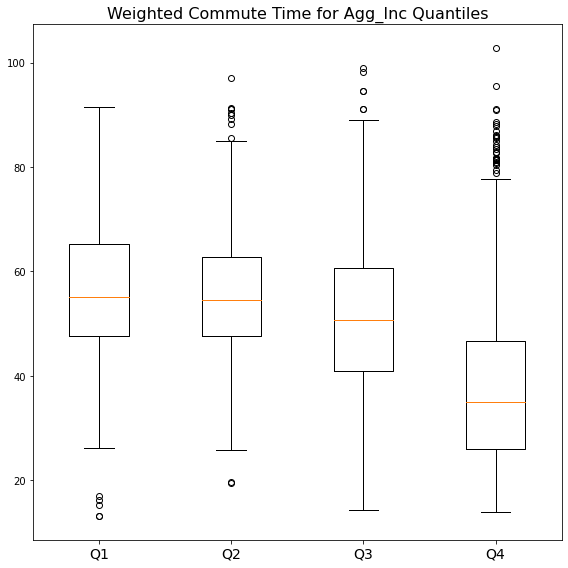

In [994]:
fig = plt.figure(figsize =(8, 8))
tt_type='w_tt'
# Creating axes instance
ax = fig.add_subplot(111) 
# Creating plot
bp = ax.boxplot([q1_df[tt_type],q2_df[tt_type],q3_df[tt_type],q4_df[tt_type]])
ax.set_xticklabels(['Q1','Q2','Q3','Q4'],fontsize=14)
ax.set_title('Weighted Commute Time for '+age_col+' Quantiles', fontsize=16)
plt.tight_layout()
#plt.savefig('../Outputs/gini_boxplot_mintt.png')
# show plot
plt.show()

In [995]:
income_q4_df['boro_name'].unique()

array(['Manhattan', 'Brooklyn', 'Bronx', 'Queens'], dtype=object)

In [996]:
### t-tests the means

# Multivariate Regression
* Inputs: Income, race, age, job type

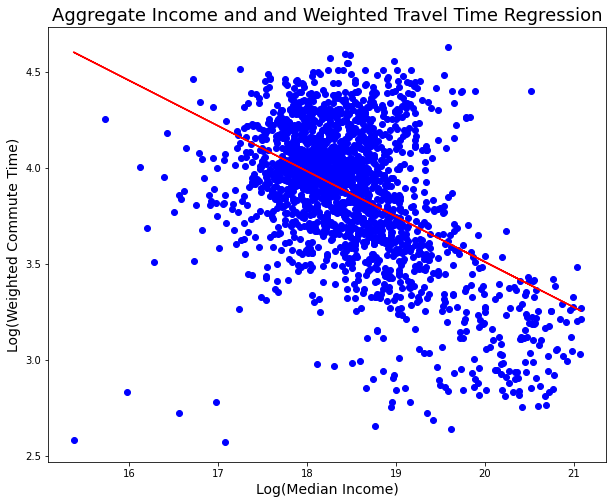

In [997]:
# Conduct linear regression
X = np.asarray(np.log(tract_info['Agg_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Median Income)', fontsize=14)
ax.set_ylabel('Log(Weighted Commute Time)', fontsize=14)
ax.set_title("Aggregate Income and and Weighted Travel Time Regression", fontsize=18)
# ax.set_title('Population vs. Mean Commute Time Linear Regression')
plt.show()

In [998]:
r_squared

0.2476277251163418

In [999]:
import statsmodels.api as sm
X = np.asarray(np.log(tract_info['Agg_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
X = sm.add_constant(X)


# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     650.0
Date:                Wed, 03 May 2023   Prob (F-statistic):          3.42e-124
Time:                        17:41:23   Log-Likelihood:                -546.19
No. Observations:                1977   AIC:                             1096.
Df Residuals:                    1975   BIC:                             1108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2371      0.172     48.007      0.0

In [1000]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', 'J_Tot', 'J_W_1', 'J_B_1', 'J_W_2', 'J_B_2',
       'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'Perc_Car',
       'Perc_Trans', 'Perc_Bus', 'Perc_Subw', 'Perc_White', 'Perc_Black',
       'Perc_Hispanic_', 'Perc_Asian', 'Perc_Other', 'Perc_Mixed',
       'Perc_Edu_hs', 'Perc_Edu_bac', 'Perc_NonWhite', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAb

In [1001]:
tract_info.fillna(0,inplace=True)

In [1002]:
tract_info['log_inc']= np.asarray(np.log(tract_info['M_Age_Wor'])).reshape(-1, 1)
tract_info['log_w_tt'] = np.asarray(np.log(tract_info['w_tt'])).reshape(-1, 1)
tract_info['log_age_wor'] = np.asarray(np.log(tract_info['M_Age_Wor'])).reshape(-1, 1)



In [1003]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'CBD5', 'CBD6', 'CBD7', 'CBD8', 'CBD9', 'CBD10',
       'CBD11', 'CBD12', 'CBD13', 'CBD14', 'CBD15', 'CBD16', 'CBD17', 'CBD18',
       'CBD19', 'CBD20', 'CBD21', 'CBD22', 'w_tt', 'mean_tt', 'min_tt',
       'Pop_Tot', 'Pop_18', 'J_Tot', 'J_W_1', 'J_B_1', 'J_W_2', 'J_B_2',
       'J_B_3', 'Median_Inc', 'Agg_Inc', 'M_Age_Wor', 'M_Age_All', 'Perc_Car',
       'Perc_Trans', 'Perc_Bus', 'Perc_Subw', 'Perc_White', 'Perc_Black',
       'Perc_Hispanic_', 'Perc_Asian', 'Perc_Other', 'Perc_Mixed',
       'Perc_Edu_hs', 'Perc_Edu_bac', 'Perc_NonWhite', 'WhiteTot',
       'WhiteAbove18', 'BlackTot', 'BlackAbove18', 'Hispanic_Tot',
       'Hispanic_Above18', 'AsianTot', 'AsianAb

In [1004]:
tract_info['Perc_J_W']=(tract_info['J_W_1']+tract_info['J_W_2'])/tract_info['J_Tot']
tract_info['Perc_J_B']=(tract_info['J_B_1']+tract_info['J_B_2']+tract_info['J_B_3'])/tract_info['J_Tot']

In [1007]:
#formula='log_w_tt~ 1 +log_inc+log_age_wor'#  + M_Age_Wor+WhiteAbove18+Edu_bacTot+BlackTot'

formula='w_tt~ M_Age_Wor+Perc_Black+J_B_1+J_B_2+Agg_Inc+WhiteAbove18+Perc_Car+Perc_Bus'
#formula='w_tt~ Agg_Inc+Median_Inc'

In [1008]:
# import formula api as alias smf 
import statsmodels.formula.api as smf 
# formula: response ~ predictor + predictor 
est = smf.ols(formula, data=tract_info).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   w_tt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1066.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        17:41:32   Log-Likelihood:                -6701.7
No. Observations:                1977   AIC:                         1.342e+04
Df Residuals:                    1968   BIC:                         1.347e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.0654      1.791      9.529   